# Project Three: Predicting House Price With Regression

<div>
<img src="../images/house.jpg" alt="house image" width="20%"/>
</div>

## Introduction
---

The [Kaggle House Price Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) is a competition in which users try and get the best prediction of housing. Kaggle evaluates a submission on the "Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price".

Both the training and testing sets are provided with the training set used for predicting housing prices, and the testing set used as a reference but without the price. Additionally, we will use this dataset to explore other insights, such as identifying which features contribute the most to price variations.
Some key questions we seek to answer include:
- How "good" can we get the predicted price?
- Can we build an accurate predictive model for housing prices using linear regression?
- How do different sizes, and qualities affect a house’s value?

To predict a price, we'll use some form of regression. The first Experiment of three will focus on Linear Regression, and then in the next experiment,  we'll use another regression model to see if accuracy improves or not. Finally, in the last experiment, we'll perform some data manipulation to compare how those changes affected both models.

<strong>For this draft, I'll not be submitting to kaggle and instead just split the training data and evaluate the RMSE myself</strong>

The dataset has ~80 different features with around 1,400+ total rows. The columns are displayed below and follow with a description:
<table>
    <tr>
        <td><strong>Feature</strong></td>
        <td><strong>Description</strong></td>
    </tr>
    <tr>
        <td>SalePrice</td>
        <td>The property's sale price in dollars <strong>(Target Variable)</strong></td>
    </tr>
    <tr>
        <td>MSSubClass</td>
        <td>The building class (e.g., single-family detached, townhouse)</td>
    </tr>
    <tr>
        <td>MSZoning</td>
        <td>The general zoning classification (e.g., residential, commercial)</td>
    </tr>
    <tr>
        <td>LotFrontage</td>
        <td>Linear feet of street connected to the property</td>
    </tr>
    <tr>
        <td>LotArea</td>
        <td>Lot size in square feet</td>
    </tr>
    <tr>
        <td>Street</td>
        <td>Type of road access (e.g., paved, gravel)</td>
    </tr>
    <tr>
        <td>Alley</td>
        <td>Type of alley access (if any)</td>
    </tr>
    <tr>
        <td>LotShape</td>
        <td>General shape of the property</td>
    </tr>
    <tr>
        <td>LandContour</td>
        <td>Flatness of the property</td>
    </tr>
    <tr>
        <td>Utilities</td>
        <td>Type of utilities available (e.g., gas, electric, water)</td>
    </tr>
    <tr>
        <td>LotConfig</td>
        <td>Lot configuration (e.g., corner lot, inside lot)</td>
    </tr>
    <tr>
        <td>LandSlope</td>
        <td>Slope of the property</td>
    </tr>
    <tr>
        <td>Neighborhood</td>
        <td>Physical location within Ames city limits</td>
    </tr>
    <tr>
        <td>Condition1</td>
        <td>Proximity to main roads or railroads</td>
    </tr>
    <tr>
        <td>Condition2</td>
        <td>Proximity to main roads or railroads (if a second is present)</td>
    </tr>
    <tr>
        <td>BldgType</td>
        <td>Type of dwelling (e.g., single-family, duplex)</td>
    </tr>
    <tr>
        <td>HouseStyle</td>
        <td>Style of dwelling (e.g., one-story, two-story, split-level)</td>
    </tr>
    <tr>
        <td>OverallQual</td>
        <td>Overall material and finish quality (rated 1-10)</td>
    </tr>
    <tr>
        <td>OverallCond</td>
        <td>Overall condition rating of the house</td>
    </tr>
    <tr>
        <td>YearBuilt</td>
        <td>Original construction date of the house</td>
    </tr>
    <tr>
        <td>YearRemodAdd</td>
        <td>Year the house was remodeled or an addition was made</td>
    </tr>
    <tr>
        <td>RoofStyle</td>
        <td>Type of roof (e.g., gable, hip)</td>
    </tr>
    <tr>
        <td>RoofMatl</td>
        <td>Material of the roof</td>
    </tr>
    <tr>
        <td>Exterior1st</td>
        <td>Primary exterior covering of the house</td>
    </tr>
    <tr>
        <td>Exterior2nd</td>
        <td>Secondary exterior covering (if present)</td>
    </tr>
    <tr>
        <td>MasVnrType</td>
        <td>Masonry veneer type (e.g., brick, stone, none)</td>
    </tr>
    <tr>
        <td>MasVnrArea</td>
        <td>Masonry veneer area in square feet</td>
    </tr>
    <tr>
        <td>ExterQual</td>
        <td>Exterior material quality rating</td>
    </tr>
    <tr>
        <td>ExterCond</td>
        <td>Present condition of the material on the exterior</td>
    </tr>
    <tr>
        <td>Foundation</td>
        <td>Type of foundation (e.g., slab, crawl space, basement)</td>
    </tr>
    <tr>
        <td>BsmtQual</td>
        <td>Height of the basement</td>
    </tr>
    <tr>
        <td>BsmtCond</td>
        <td>General condition of the basement</td>
    </tr>
    <tr>
        <td>GarageType</td>
        <td>Location of the garage (e.g., attached, detached, built-in)</td>
    </tr>
    <tr>
        <td>GarageCars</td>
        <td>Size of the garage in terms of car capacity</td>
    </tr>
    <tr>
        <td>GarageArea</td>
        <td>Size of the garage in square feet</td>
    </tr>
    <tr>
        <td>PavedDrive</td>
        <td>Whether the driveway is paved</td>
    </tr>
    <tr>
        <td>MoSold</td>
        <td>Month the house was sold</td>
    </tr>
    <tr>
        <td>YrSold</td>
        <td>Year the house was sold</td>
    </tr>
    <tr>
        <td>SaleType</td>
        <td>Type of sale (e.g., normal, foreclosure, auction)</td>
    </tr>
    <tr>
        <td>SaleCondition</td>
        <td>Condition of sale (e.g., family sale, partial sale, normal sale)</td>
    </tr>
</table>


In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#dataset
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

## Pre-processing
---

There are quite a few things I want to clean up from the dataset, but let's start with the basics

### Handling nulls

In [4]:
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values())

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


There are quite a few null values. Let's just drop the columns with over half the data, that Electrical row,  and then fill in the numerical ones with the mean values.

In [5]:
df = df.drop(['PoolQC', 'MasVnrType', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
df = df.dropna(subset=["Electrical"])
df.fillna(df.mean(numeric_only=True), inplace=True)

In [6]:
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values())

BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


Okay we are left with the Catergorical ones now. There are plent of ways to go about this but I'm lazy so i'll just fill them with N/A

In [7]:
df.fillna('N/A', inplace=True)
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values())

Series([], dtype: int64)


Cool, now we can work with all the data now. It's not super perfect as well see soon, but we'll come back to this.

### Duplicates

In [8]:
df.duplicated().value_counts()

False    1459
Name: count, dtype: int64

No duplicates so let's move on.

### Dropping ID

We don't need the ID as it shouldn't affect the price at all and it would just be confusing to keep when graphing. Let's just drop it

In [9]:
df = df.drop("Id", axis=1)

### Dummies

In [10]:
df.dtypes.value_counts()

object     37
int64      34
float64     3
Name: count, dtype: int64

So we have around 37 objects which I assume are catergoirical. For now, let's just push them to dummies.

In [11]:
df = pd.get_dummies(df, drop_first=True)

In [12]:
df.dtypes.value_counts()

bool       202
int64       34
float64      3
Name: count, dtype: int64

## Data Analysis + More Cleaning
---

Let's visual some data to see if we can identify important pieces of data before we actually make a prediction. I'll be using a correlation heatmap to show the correlation between the different features. This might be bloated with a bunch of data, but we'll mainly be looking at the SalePrice feature.

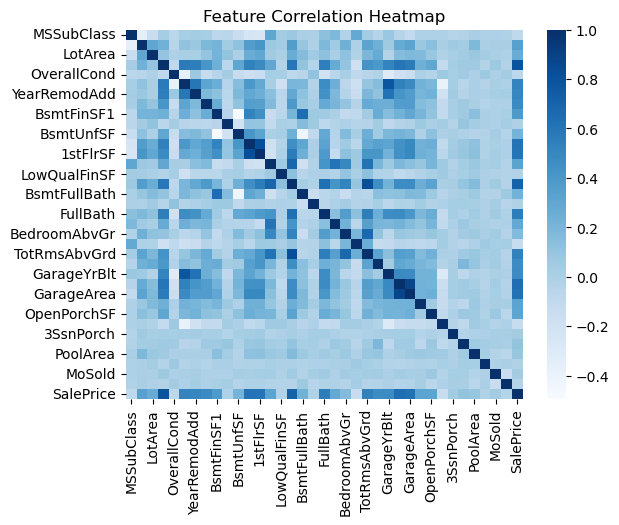

In [22]:
df_numerical = df.select_dtypes(include=['number'])
corr = df_numerical.corr()
sns.heatmap(corr, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.show()

## Experiment 1: Linear Regression
---

We're going to start with linear regression. Let's briefly review what linear regression does.

Linear regression is a statistical method used to model the relationship between a dependent variable (SalesPrice), and one or more independent variables (The 80 other features). It assumes that there is a linear relationship between the dependent and independent variables. The goal is to find the best-fit line that minimizes the difference between the actual observed values and the predicted values.

Some common evaluation methods we will use is $MSE$, $RMSE$, and $R^2$

In [14]:
#Splitting the data
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

### Evaluation

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 52125.61


In [17]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.4969853199934169


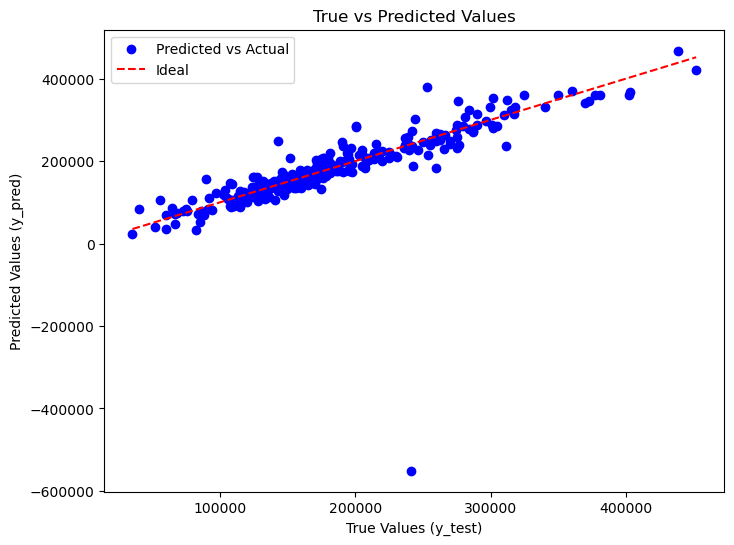

In [18]:
# Plotting the true values vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

Not super bad, but could be <strong>way</strong> better. A very weird prediction in the middle as well. Sadly, we'll have to go back to cleaning and perhaps change what was filled in for nulls or maybe another model works better.

## Experiment 2: Multiple Linear Regression (ignore this part)
---

In [19]:
#Splitting the data
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#mlr_model = sm.OLS(y_train, X_train).fit()
#print(mlr_model.summary())

### Evaluation

In [21]:
# Predict values
#y_pred = mlr_model.predict(X_train)

# Calculate RMSE
#rmse = np.sqrt(np.mean((y_train - y_pred) ** 2))
#print("RMSE:", rmse)

## Experiment 3: Changing Data
---

## Impact
---

## References
---

- [Kaggle House Price Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)